# GUÍA DE EJERCICIOS – DATOS FALTANTES, OUTLIERS Y GENERACION DE INSIGHTS

## PARTE 1: TRATAMIENTO DE DATOS FALTANTES Y OUTLIERS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Ejercicio 1: Imputación de Datos Faltantes con la Media

data = { 'Día': ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes'],
'Ventas': [1000, 1500, None, 1800, 1600],
 'Costos': [400, 700, 500, None, 800],
 'Ganancias': [600, 800, 700, 900, None] }

df = pd.DataFrame(data)
df

,Día,Ventas,Costos,Ganancias
0,Lunes,1000.0,400.0,600.0
1,Martes,1500.0,700.0,800.0
2,Miércoles,NaN,500.0,700.0
3,Jueves,1800.0,NaN,900.0
4,Viernes,1600.0,800.0,NaN


In [ ]:
df_relleno = df.copy()
df_relleno

,Día,Ventas,Costos,Ganancias
0,Lunes,1000.0,400.0,600.0
1,Martes,1500.0,700.0,800.0
2,Miércoles,NaN,500.0,700.0
3,Jueves,1800.0,NaN,900.0
4,Viernes,1600.0,800.0,NaN


In [ ]:
df_relleno.Ventas = df_relleno.Ventas.fillna(df_relleno.Ventas.mean())
df_relleno

,Día,Ventas,Costos,Ganancias
0,Lunes,1000.0,400.0,600.0
1,Martes,1500.0,700.0,800.0
2,Miércoles,1475.0,500.0,700.0
3,Jueves,1800.0,NaN,900.0
4,Viernes,1600.0,800.0,NaN


In [ ]:
df_relleno.Costos = df_relleno.Costos.fillna(df_relleno.Costos.mean())
df_relleno

,Día,Ventas,Costos,Ganancias
0,Lunes,1000.0,400.0,600.0
1,Martes,1500.0,700.0,800.0
2,Miércoles,1475.0,500.0,700.0
3,Jueves,1800.0,600.0,900.0
4,Viernes,1600.0,800.0,NaN


In [ ]:
df_relleno.Ganancias = df_relleno.Ganancias.fillna(df_relleno.Ganancias.mean())
df_relleno

,Día,Ventas,Costos,Ganancias
0,Lunes,1000.0,400.0,600.0
1,Martes,1500.0,700.0,800.0
2,Miércoles,1475.0,500.0,700.0
3,Jueves,1800.0,600.0,900.0
4,Viernes,1600.0,800.0,750.0


In [ ]:
df

,Día,Ventas,Costos,Ganancias
0,Lunes,1000.0,400.0,600.0
1,Martes,1500.0,700.0,800.0
2,Miércoles,NaN,500.0,700.0
3,Jueves,1800.0,NaN,900.0
4,Viernes,1600.0,800.0,NaN


In [ ]:
# Ejercicio 2: Eliminación de Filas con Datos Faltantes

df_eliminado = df.dropna()
df_eliminado

,Día,Ventas,Costos,Ganancias
0,Lunes,1000.0,400.0,600.0
1,Martes,1500.0,700.0,800.0


In [ ]:
# Ejercicio 3: Identificación de Outliers usando IQR

# Datos de ventas

ventas = [1000, 1500, 1200, 1800, 1600, 3000, 50]
df1 = pd.DataFrame({'Ventas': ventas})
df2 = df1.copy()
df2

,Ventas
0,1000
1,1500
2,1200
3,1800
4,1600
5,3000
6,50


In [ ]:
df2.describe()

,Ventas
count,7.000000
mean,1450.000000
std,892.094913
min,50.000000
25%,1100.000000
50%,1500.000000
75%,1700.000000
max,3000.000000


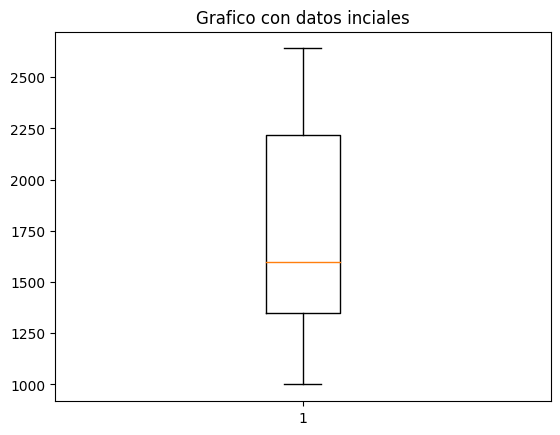

In [ ]:
plt.boxplot(df2['Ventas'])
plt.title("Grafico con datos inciales")
plt.show()

In [ ]:
# Calcula el IQR para la columna "Ventas".

Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
IQR

,0
Ventas,600.0


In [ ]:
# Identifica las filas donde las ventas son outliers (valores por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR).

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df2[(df2['Ventas'] < limite_inferior[0]) | (df2['Ventas'] > limite_superior[0])]

outliers

<ipython-input-74-bda17c81caa3>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  outliers = df2[(df2['Ventas'] < limite_inferior[0]) | (df2['Ventas'] > limite_superior[0])]


,Ventas
5,3000
6,50


In [ ]:
# Ejercicio 4: Reemplazo de Outliers con el Percentil 95
# 1.	Calcula el percentil 95 para la columna "Ventas".
percentile_95 = df2['Ventas'].quantile(0.95)
percentile_95


2639.999999999999

In [ ]:
# 2.	Reemplaza los outliers detectados con este valor.
df2['Ventas'] = np.where((df2['Ventas'] < limite_inferior[0]) | (df2['Ventas'] > limite_superior[0]), percentile_95, df2['Ventas'])


<ipython-input-76-312ffa985ddf>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df2['Ventas'] = np.where((df2['Ventas'] < limite_inferior[0]) | (df2['Ventas'] > limite_superior[0]), percentile_95, df2['Ventas'])


In [ ]:
print(df2)

   Ventas
0  1000.0
1  1500.0
2  1200.0
3  1800.0
4  1600.0
5  2640.0
6  2640.0


In [ ]:
df2.describe()

,Ventas
count,7.000000
mean,1768.571429
std,649.908418
min,1000.000000
25%,1350.000000
50%,1600.000000
75%,2220.000000
max,2640.000000


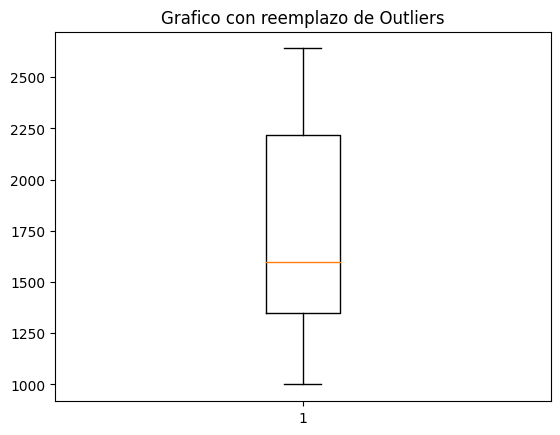

In [ ]:
plt.boxplot(df2['Ventas'])
plt.title("Grafico con reemplazo de Outliers")
plt.show()

In [ ]:
# Ejercicio 5: Eliminación de Outliers

# 1. Calcula el IQR para la columna "Ventas".
Q1 = df1['Ventas'].quantile(0.25)
Q3 = df1['Ventas'].quantile(0.75)
IQR = Q3 - Q1

# 2. Elimina las filas donde las ventas son outliers.
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df1 = df1[(df1['Ventas'] >= limite_inferior) & (df1['Ventas'] <= limite_superior)]

# 3. Muestra el DataFrame sin outliers.
print(df1)

   Ventas
0    1000
1    1500
2    1200
3    1800
4    1600


In [ ]:
df1.describe()


,Ventas
count,5.000000
mean,1420.000000
std,319.374388
min,1000.000000
25%,1200.000000
50%,1500.000000
75%,1600.000000
max,1800.000000


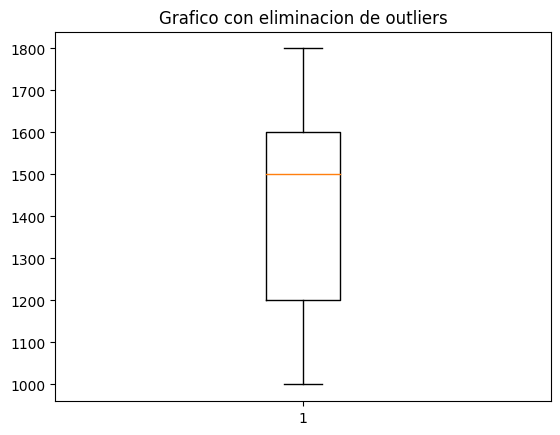

In [ ]:
plt.boxplot(df1['Ventas'])
plt.title("Grafico con eliminacion de outliers")
plt.show()